In [49]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from zipfile import ZipFile


In [50]:
#!wget 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'

In [51]:
df = pd.read_csv('bank/bank-full.csv', delimiter=';')

In [52]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [53]:
df.tail(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45196,25,student,single,secondary,no,358,no,no,cellular,16,nov,330,1,-1,0,unknown,yes
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


In [54]:
print(df.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [55]:
df = df[['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y'
]]

### Question 1
secondary

In [56]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [57]:
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

numerical = ['age','balance','day','duration','campaign','pdays','previous']

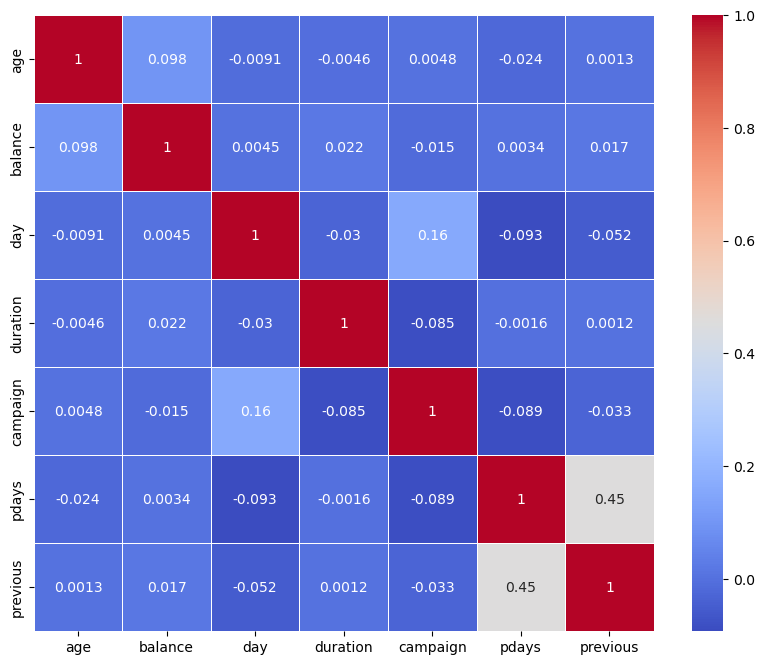

In [58]:
correlation_matrix = df[numerical].corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

### Question 2
pdays and previous

In [59]:
df.y= (df.y =='yes').astype(int)

In [60]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [61]:
df_train_and_val, df_test = train_test_split(df, test_size=0.2001, random_state=42)

In [62]:
df_train, df_val = train_test_split(df_train_and_val, test_size=0.25015, random_state=42)

In [63]:
len(df_train), len(df_val), len(df_test)

(27117, 9047, 9047)

In [64]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [65]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [66]:
df_train_and_val = df_train_and_val.reset_index(drop=True)

In [67]:
df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,43,admin.,married,secondary,672,yes,unknown,20,jun,14,6,-1,0,unknown,0
1,34,services,single,tertiary,371,no,unknown,20,may,77,1,-1,0,unknown,0
2,35,admin.,married,secondary,4698,yes,unknown,16,jun,359,1,-1,0,unknown,0
3,42,entrepreneur,married,secondary,-480,yes,unknown,2,jun,351,6,-1,0,unknown,0
4,36,technician,married,secondary,283,yes,unknown,27,jun,56,2,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27112,39,blue-collar,single,primary,-100,yes,cellular,14,may,159,1,358,2,failure,0
27113,27,admin.,single,secondary,1,yes,unknown,12,may,86,1,-1,0,unknown,0
27114,36,housemaid,married,secondary,0,no,cellular,21,aug,76,2,-1,0,unknown,0
27115,60,housemaid,married,primary,211,no,cellular,26,feb,480,2,189,1,failure,0


In [68]:
del df_train['y']
del df_val['y']
del df_test['y']

In [69]:
def muntual_info_y_score(series):
    return mutual_info_score(series, df_train_and_val.y)

In [70]:
mi = df_train_and_val[categorical].apply(muntual_info_y_score)
round(mi.sort_values(ascending=False),2)

poutcome     0.03
month        0.02
contact      0.01
housing      0.01
job          0.01
education    0.00
marital      0.00
dtype: float64

### Question 3
poutcome

### One hot encoding

In [71]:
dv = DictVectorizer(sparse=False)

In [72]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [73]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [74]:
train_dict

[{'job': 'admin.',
  'marital': 'married',
  'education': 'secondary',
  'housing': 'yes',
  'contact': 'unknown',
  'month': 'jun',
  'poutcome': 'unknown',
  'age': 43,
  'balance': 672,
  'day': 20,
  'duration': 14,
  'campaign': 6,
  'pdays': -1,
  'previous': 0},
 {'job': 'services',
  'marital': 'single',
  'education': 'tertiary',
  'housing': 'no',
  'contact': 'unknown',
  'month': 'may',
  'poutcome': 'unknown',
  'age': 34,
  'balance': 371,
  'day': 20,
  'duration': 77,
  'campaign': 1,
  'pdays': -1,
  'previous': 0},
 {'job': 'admin.',
  'marital': 'married',
  'education': 'secondary',
  'housing': 'yes',
  'contact': 'unknown',
  'month': 'jun',
  'poutcome': 'unknown',
  'age': 35,
  'balance': 4698,
  'day': 16,
  'duration': 359,
  'campaign': 1,
  'pdays': -1,
  'previous': 0},
 {'job': 'entrepreneur',
  'marital': 'married',
  'education': 'secondary',
  'housing': 'yes',
  'contact': 'unknown',
  'month': 'jun',
  'poutcome': 'unknown',
  'age': 42,
  'balance':

In [75]:
y_pred = model.predict_proba(X_val)[:,1]

In [76]:
treshhold = y_pred >=0.5

In [77]:
round((y_val==treshhold).mean(),2)

0.9

### Question 4 
0.9

In [78]:
features = [2,3,4,5,6]
results = []

for i in range(len(features)):
    set_of_fetures = (features[0] - (sum(features[:i] + features[i+1:])))
    results.append(set_of_fetures)


print(results)


[-16, -15, -14, -13, -12]


In [79]:
features = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome',
'age','balance','day','duration','campaign','pdays','previous']

results = []
for i in range(len(features)):
    set_of_fetures = features[:i] + features[i+1:]
    train_dict = df_train[set_of_fetures].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[set_of_fetures].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    test_dict = df_test[set_of_fetures].to_dict(orient='records')
    X_test = dv.transform(test_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:,1]

    churn_desicion = (y_pred >=0.5)

    result = (y_val == churn_desicion).mean()

    results.append(result)

train_dict = df_train[features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[features].to_dict(orient='records')
X_test = dv.transform(test_dict)

model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:,1]

churn_desicion = (y_pred >=0.5)

full = (y_val == churn_desicion).mean()

diff = [full - record for record in results]
print(diff)


[-0.0003316016359014018, -0.0006632032718028036, -0.0009948049077042054, 0.0, -0.0002210677572676012, 0.000552669393169003, 0.0067425665966619475, -0.000552669393169003, -0.0014369404222394078, -0.001105338786338006, 0.008842710290704159, -0.0003316016359014018, -0.000552669393169003, -0.0009948049077042054]


### Question 5 
Smallest diff is -0.000552669393169003 which is 'age'

In [80]:
coeff_ = [0.001, 0.01, 0.1, 1, 10,100]
models = []

for c in coeff_:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:,1]

    churn_desicion = (y_pred >=0.5)

    result = (y_val == churn_desicion).mean()

    models.append((round(result,3)))

models

[0.894, 0.9, 0.903, 0.903, 0.905, 0.904]

### Question 6
Best result for accuracy is 0.905 which led by c coefficient 10